In [12]:
import glob
import cv2
import random as random
import numpy as np
import matplotlib.pyplot as plt

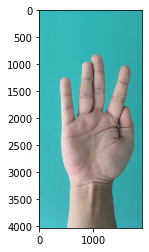

In [13]:
base_path = "E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/"

image_path_by_class = []

for i in range(4):
    c_p = base_path + str(i) + "/" + "*.jpg"
    image_path_by_class.append(glob.glob(c_p))
    
# print(image_path_by_class)

test_img = cv2.imread(image_path_by_class[0][2])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)


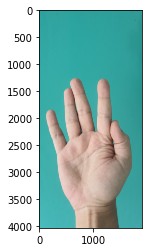

In [14]:
# random.seed(42)
#amestecam baza de date
for a in image_path_by_class:
  
  # random.shuffle(a, lambda: .5) 
  random.Random(42).shuffle(a)
  # print(a)
# print(image_path_by_class)

test_img = cv2.imread(image_path_by_class[0][1])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

In [15]:
train_path = []
test_path = []

for a in image_path_by_class:
    clasa_t = []
    clasa_v = []
    for index, elem in enumerate(a):
        # print(index, elem)
        if(index < 7):
            clasa_t.append(elem)
        else:
            clasa_v.append(elem)
    train_path.append(clasa_t)
    test_path.append(clasa_v)
            
print(len(train_path[0]), len(test_path[0]))
# print("----------")
print(test_path)

7 3
[['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/0\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/0\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/0\\1.jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/1\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/1\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/1\\1.jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/2\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/2\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/2\\1.jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/3\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/3\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Images/3\\1.jpg']]


In [16]:
train = []
test = []

for cls in train_path:
    images = []
    for elem in cls:
        img = cv2.imread(elem)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    train.append(images)
    
for cls in test_path:
    images = []
    for elem in cls:
        img = cv2.imread(elem)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    test.append(images)

Text(0.5, 1.0, 'Test 1 din clasa 2')

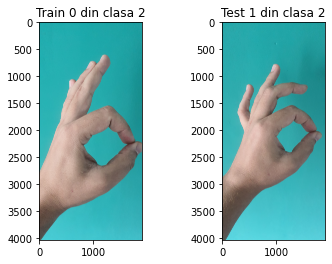

In [17]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[2][0])
plt.title("Train 0 din clasa 2")
plt.subplot(1,2,2)
plt.imshow(test[2][1])
plt.title("Test 1 din clasa 2")


In [18]:
print(np.shape(test[0][0]))
# Modificam dimensiunea imaginilor pentru a fi mai usor de lucrat cu ele
# (in plus 80% din imagine este ocupata de acel verde care nu aduce nicio informatie in plus si de care ar fi bine sa scapam)

(4032, 1908, 3)


In [19]:
h,w,c = test[0][0].shape
new_h = h // 4
new_w = w // 4
print(new_h, new_w)

for i, cls in enumerate(train):
    for j, imagine in enumerate(cls):
        r = cv2.resize(imagine, (new_w,new_h))
        train[i][j] = r
        
for i, cls in enumerate(test):
    for j, imagine in enumerate(cls):
        r = cv2.resize(imagine, (new_w,new_h))
        test[i][j] = r
        

1008 477


Text(0.5, 1.0, 'Test 2 din clasa 2')

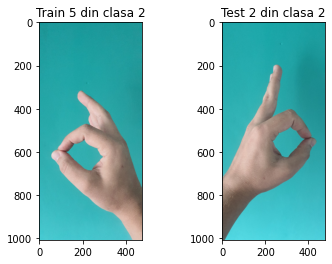

In [20]:
test_cls = 2
train_img = 5
test_img = 2

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[test_cls][train_img])
plt.title("Train {} din clasa {}".format(train_img,test_cls))
plt.subplot(1,2,2)
plt.imshow(test[test_cls][test_img])
plt.title("Test {} din clasa {}".format(test_img,test_cls))


## Observatii fata de imagini:
1. au prea multa infornatie de culoare
1. facem histograma si observam ca putem lucra doar pe planul de rosu + verde
1. putem ignora albastrul cu totul

Transformam imaginiile in grayscale folosind media dintre canalul verde si cel rosu

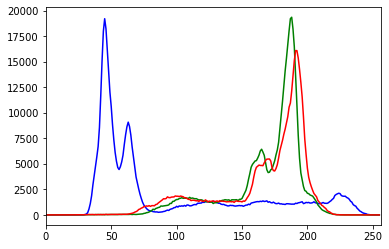

In [21]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([test[0][2]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

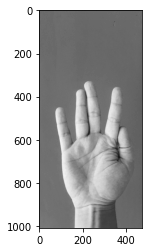

In [22]:
train_gray = []
test_gray = []
for cls in train:
    tmp = []
    for img in cls:
        mean_img = np.mean((img[:,:,0], img[:,:,1]),axis=0)
        tmp.append(mean_img)
    train_gray.append(tmp)

for cls in test:
    tmp = []
    for img in cls:
        mean_img = np.mean((img[:,:,0], img[:,:,1]),axis=0)
        tmp.append(mean_img)
    test_gray.append(tmp)
    
plt.figure()
plt.imshow(test_gray[0][0], cmap='gray')

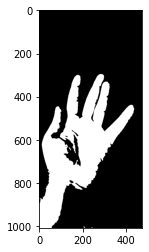

In [23]:
#incercam sa obtinem o masca pentru mana
#de aici faceti voi multe for-uri
img = train_gray[0][0]

#prima oara trebuie neaparat un blur
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img,-1,kernel)

# th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)#meh
ret,th = cv2.threshold(img,130,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(th, cmap="gray")

Text(0.5, 1.0, 'Edges')

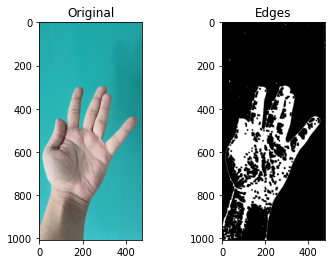

In [26]:
img = train[0][0]

# kernel = np.ones((5,5),np.float32)/25
# img = cv2.filter2D(img,-1,kernel)
kernel = np.ones((7,7),np.uint8)

edges = cv2.Canny(img,30,50)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


plt.figure()
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("Edges")

# Laboratorul 2

- scoatem contururile
- cream masca

In [32]:
def condition(img):
    R,G,B = np.split(img,indices_or_sections=3, axis=2)
    C1 = (R> 95) & (G>40) & (B>20) # nuantele generale de piele
    # compoenentele r,g,b nu trebuie sa fie prea aproape unul de altul => eliminam griurile
    C2 = ((np.vstack([R,G,B]).max(axis=0) - np.vstack([R,G,B]).min(axis=0) > 15))
    # componentele rosu si verde sa nu fie prea apropiate intre ele
    C3 = (np.abs(R-G) > 15)
    # cea mai puternica nuanta trebuie sa fie rosu fiind piele
    C4 = (R>G)&(R>B)

    # restul sunt conditii de iluminant
    C5 = (R>220) & (G>210) & (B>170)
    C6 = (np.abs(R-G) <= 15)
    C7 = (R>B) & (G>B)
    # combinam toate conditiile
    cond1 = (C1 * C2 * C3 * C4) + (C4 * C5 * C6 * C7)
    cond1[cond1 > 1] = 1 # vrem ca 1+1 sa dea 1 nu 2
    return cond1

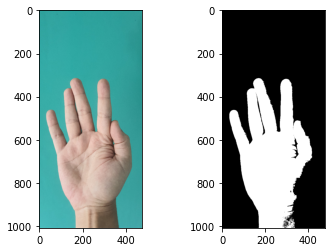

In [34]:
mask = []
for idx_cls, cls in enumerate(train):
  mask.append([])
  for idx_im, im in enumerate(cls):
    mask[idx_cls].append(condition(train[0][1]).squeeze(axis=2))
# nucleu = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
# mask = cv2.morphologyEx(mask.astype(np.float32), cv2.MORPH_CLOSE, nucleu,iterations=2)
plt.figure()
plt.subplot(121);plt.imshow(train[0][1])
plt.subplot(122);plt.imshow(mask[0][1],cmap='gray')

## Scheletul imaginii
schelet = imagine erodata pana ce ajunge la grosimea de 1px dar fara sa piarda info esentiala

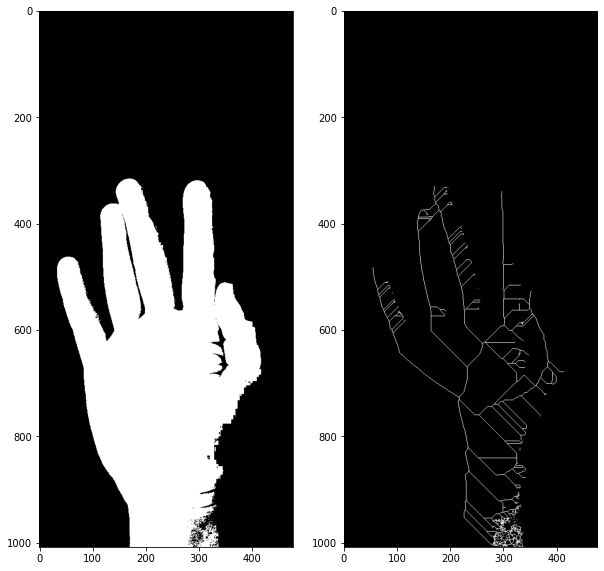

In [35]:
from skimage.morphology import skeletonize

mask2 = skeletonize(mask[0][1], method='zhang')
plt.figure(figsize=(10,20))
plt.subplot(121);plt.imshow(mask[0][1],cmap='gray')
plt.subplot(122);plt.imshow(mask2,cmap='gray')

4


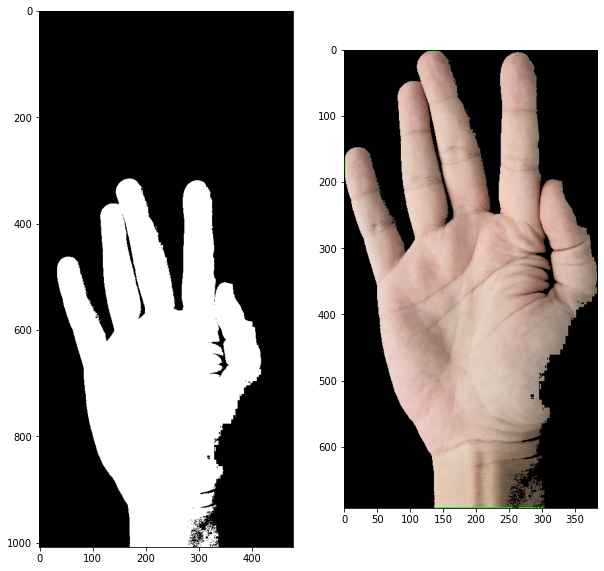

In [43]:
masked_images = []
for idx_cls, m in enumerate(mask):
  masked_images.append([])
  for idx_im, mas in enumerate(m):
    # gasim punctele din imagine care definesc conturul mainii
    contours, hierarchy = cv2.findContours(mas.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    img_copy = train[0][1].copy()
    # cv2.drawContours(img_copy, contours[3], -1, (0,255,0), 3)
    # plt.figure(figsize=(10,20))
    # plt.imshow(img_copy)


    # bazandu-ne pe contururi cautam bounding box-ul cu cea mai mare arie
    dreptunghi = None
    maxArea = 0
    indice = 0
    for i,cont in enumerate(contours):
      tmp = cv2.boundingRect(cont)
      if maxArea < tmp[2] * tmp[3]:
        maxArea = tmp[2] * tmp[3]
        dreptunghi = tmp
        indice = i

    dr = dreptunghi
    cv2.rectangle(img_copy,(dr[0],dr[1]),(dr[0]+dr[2],dr[1]+dr[3]),(0,255,0),2)

    img_copy = img_copy[dreptunghi[1]:dreptunghi[1]+dreptunghi[3],dreptunghi[0]:dreptunghi[0] + dreptunghi[2]]
    mas = mas[dreptunghi[1]:dreptunghi[1]+dreptunghi[3],dreptunghi[0]:dreptunghi[0] + dreptunghi[2]]

    img_copy[mas==0] = 0
    masked_images[idx_cls].append(img_copy)

plt.figure(figsize=(10,20))
plt.subplot(121);plt.imshow(mask[0][1],cmap='gray')
plt.subplot(122);plt.imshow(masked_images[0][1],cmap='gray')

print(len(masked_images))

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
28
(28, 756)


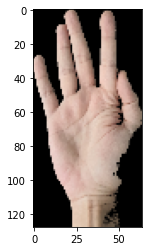

In [41]:
height = 128
width = 64

winSize = (32,32)
blockSize = (32,32)
blockStride = (16,16)
cellSize = (16,16)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)


labels=[]
features=[]

for idx_cls, cls in enumerate(masked_images):
  if idx_cls == 0:
    plt.figure()
    plt.imshow(cv2.resize(masked_images[1][1],(width,height)))
  for im in cls:
    small_im = cv2.resize(img,(width,height))
    descriptor = hog.compute(small_im)
    labels.append(idx_cls)
    features.append(descriptor)

print(labels)
print(len(labels))
print(np.shape(features))